In [136]:
#Data acquisition

In [59]:
import pandas as pd
import numpy as np

In [60]:
df1 = pd.read_csv("San_Francisco.csv")
df2 = pd.read_csv("New_York.csv")

In [61]:
df1 = df1.copy()
df2 = df2.copy()

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    350 non-null    object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                350 non-null    object 
 3   ADDRESS                                                                                      349 non-null    object 
 4   CITY                                                                                         350 non-null    object 
 5   STATE OR PROVINCE                   

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 27 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   SALE TYPE                                                                                    350 non-null    object 
 1   SOLD DATE                                                                                    0 non-null      float64
 2   PROPERTY TYPE                                                                                350 non-null    object 
 3   ADDRESS                                                                                      347 non-null    object 
 4   CITY                                                                                         349 non-null    object 
 5   STATE OR PROVINCE                   

In [64]:
#Data Visualization

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

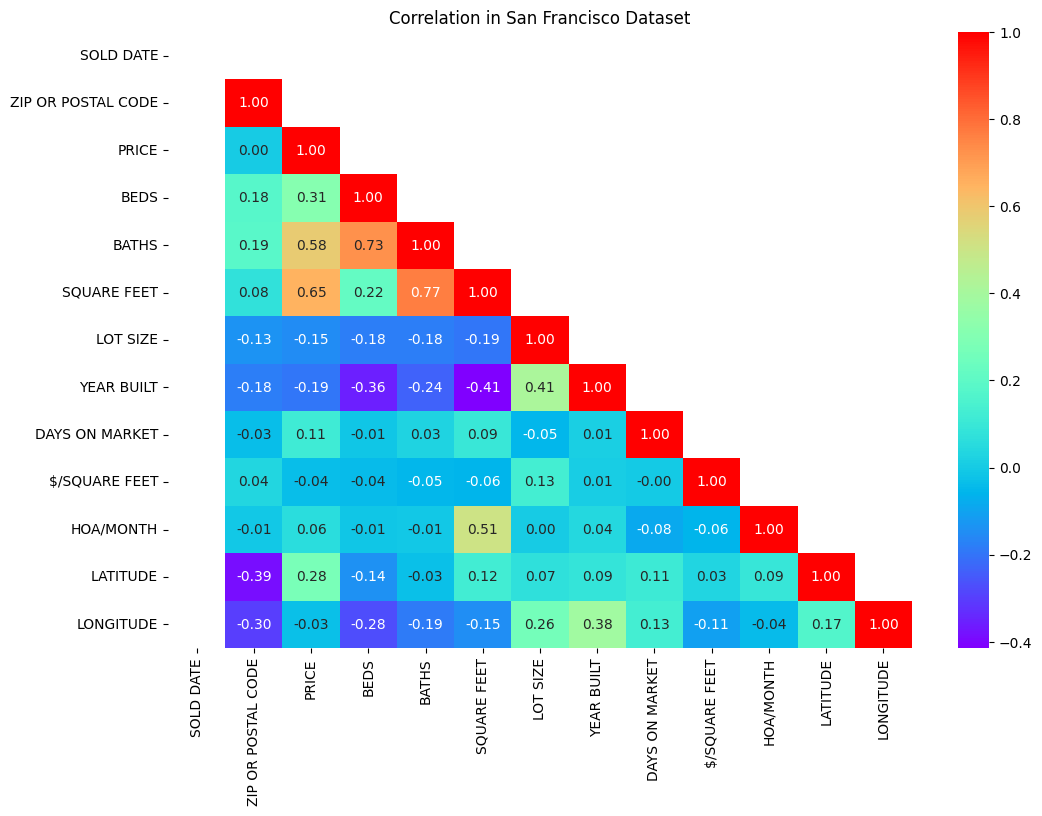

In [66]:
#visualizing correlation
plt.figure(figsize=(12,8))
plt.title("Correlation in San Francisco Dataset")
sns.heatmap(df1.corr(numeric_only = True),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df1.corr(numeric_only = True),+1))
plt.show()

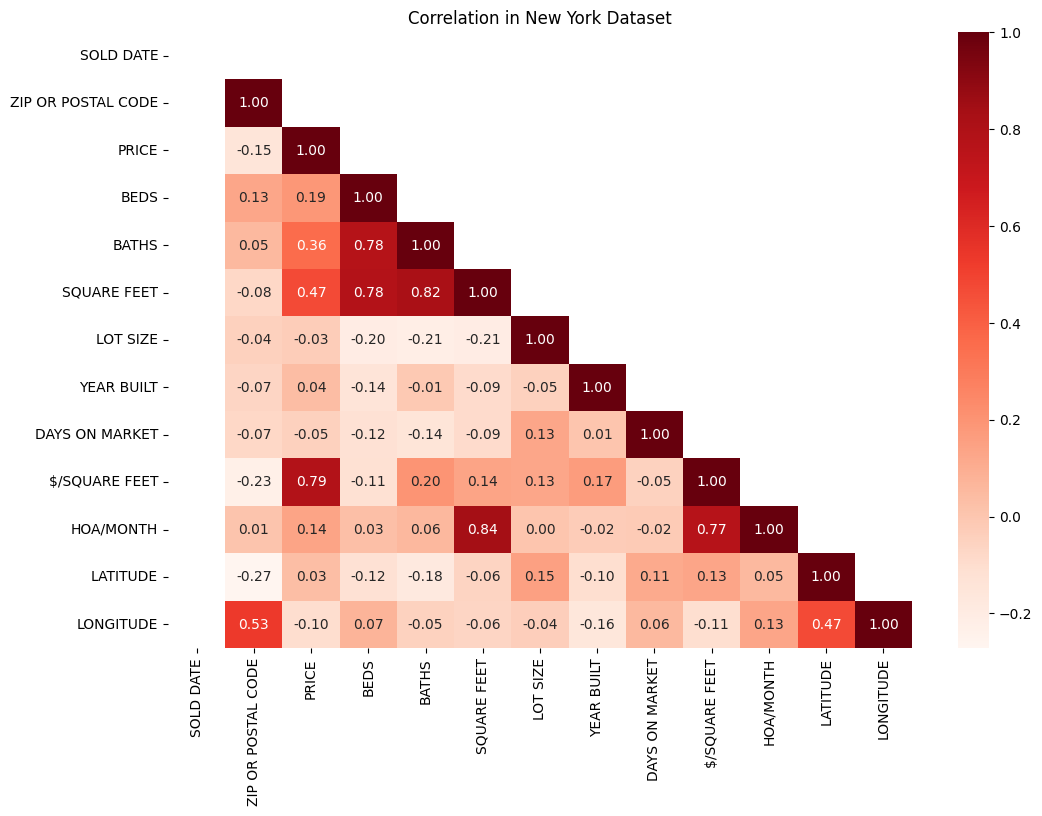

In [67]:
plt.figure(figsize=(12,8))
plt.title("Correlation in New York Dataset")
sns.heatmap(df2.corr(numeric_only = True),annot=True,fmt='.2f',cmap='Reds',mask=np.triu(df2.corr(numeric_only = True),+1))
plt.show()

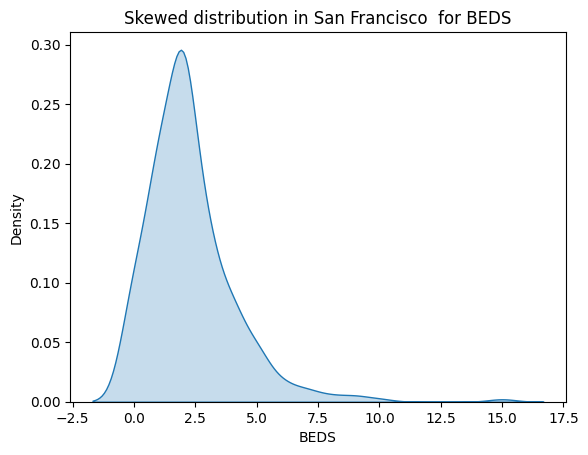

<Figure size 640x480 with 0 Axes>

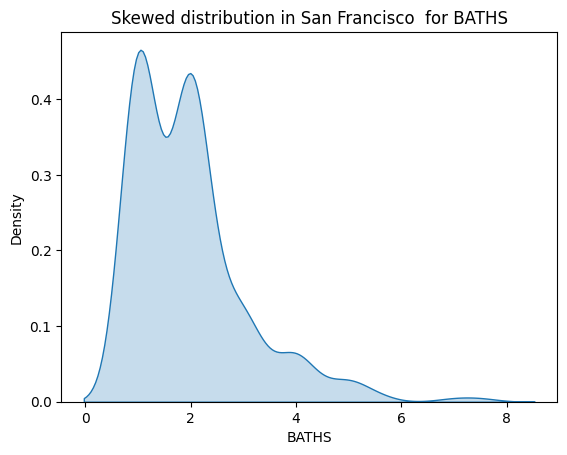

<Figure size 640x480 with 0 Axes>

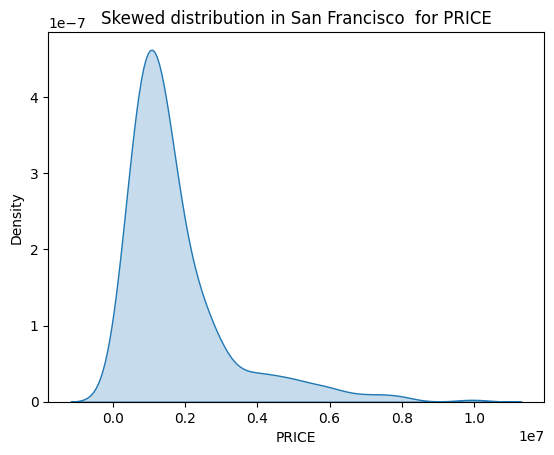

<Figure size 640x480 with 0 Axes>

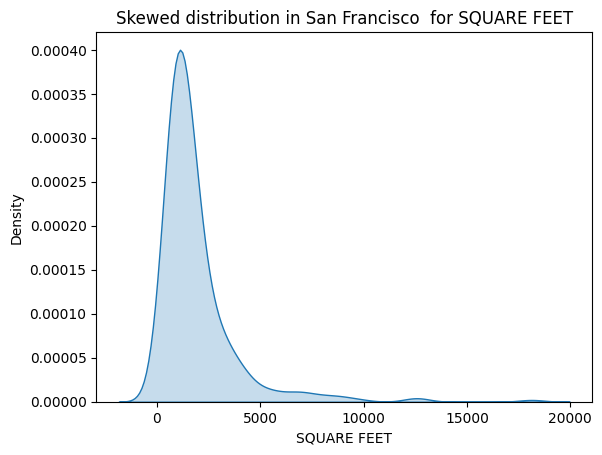

<Figure size 640x480 with 0 Axes>

In [68]:
# Correct skewed distribution of features
cols = ['BEDS','BATHS','PRICE', 'SQUARE FEET',]
for x in cols:
    plt.title("Skewed distribution in San Francisco  for " + x )
    sns.kdeplot(data = df1[x], fill = True)
    plt.figure()
    plt.show()

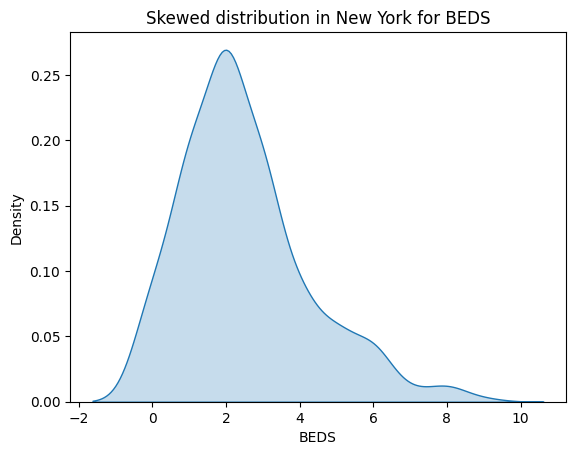

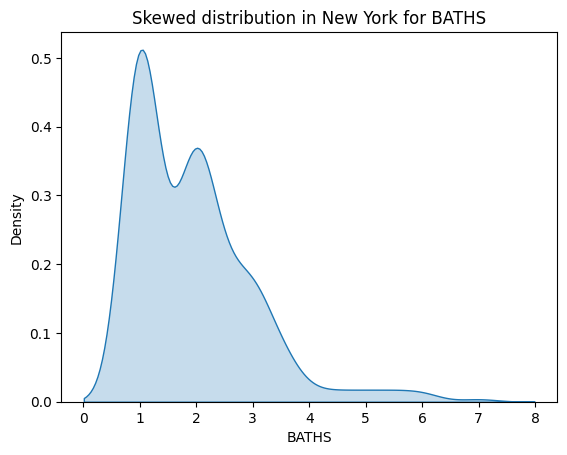

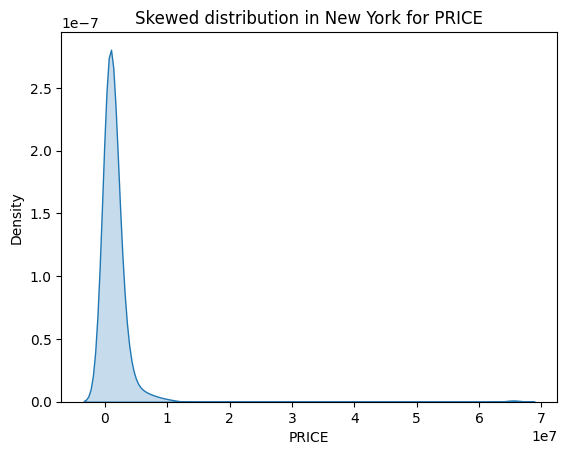

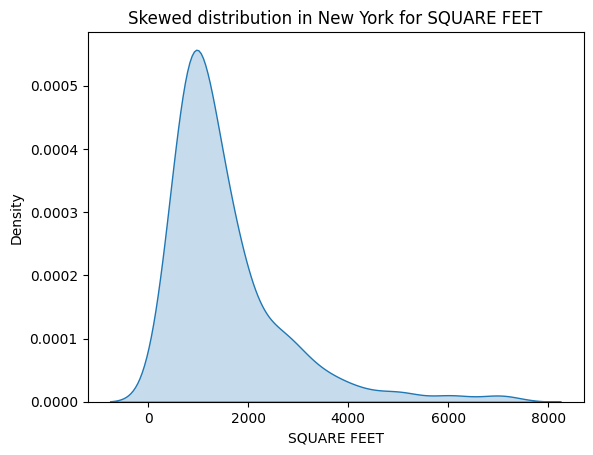

<Figure size 640x480 with 0 Axes>

In [69]:
cols = ['BEDS','BATHS','PRICE', 'SQUARE FEET',]
for x in cols:
    plt.title("Skewed distribution in New York for " + x )
    sns.kdeplot(data = df2[x], fill = True)
    plt.figure()

<AxesSubplot: title={'center': 'Price vs $/Square Feet'}, xlabel='$/SQUARE FEET', ylabel='PRICE'>

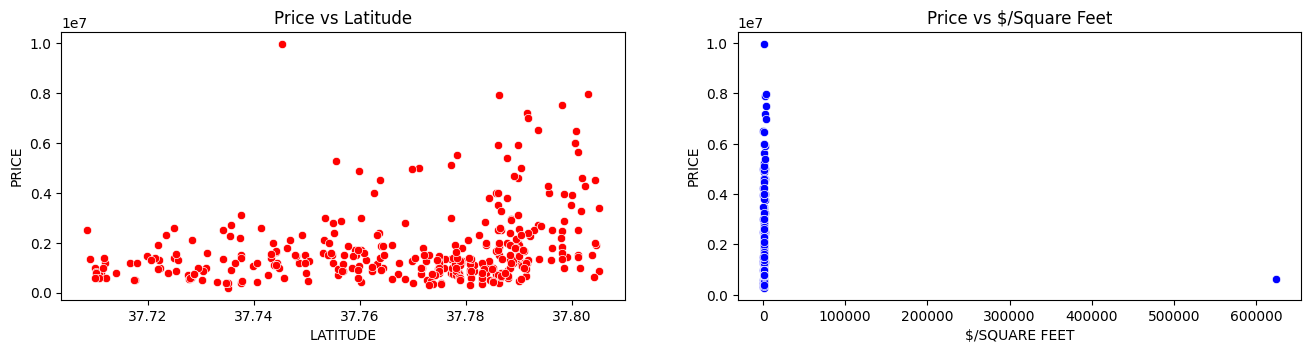

In [70]:
#showing relationship with price using scatter plot
fig = plt.figure(figsize=(16,16))
fig.add_subplot(4,2,1)
plt.title("Price vs Latitude")
sns.scatterplot(x = df1['LATITUDE'], y = df1['PRICE'] ,color='red')
fig.add_subplot(4,2,2)
plt.title("Price vs $/Square Feet")
sns.scatterplot(x = df1['$/SQUARE FEET'], y = df1['PRICE'],color='blue')

<AxesSubplot: title={'center': 'Price vs $/Square Feet'}, xlabel='$/SQUARE FEET', ylabel='PRICE'>

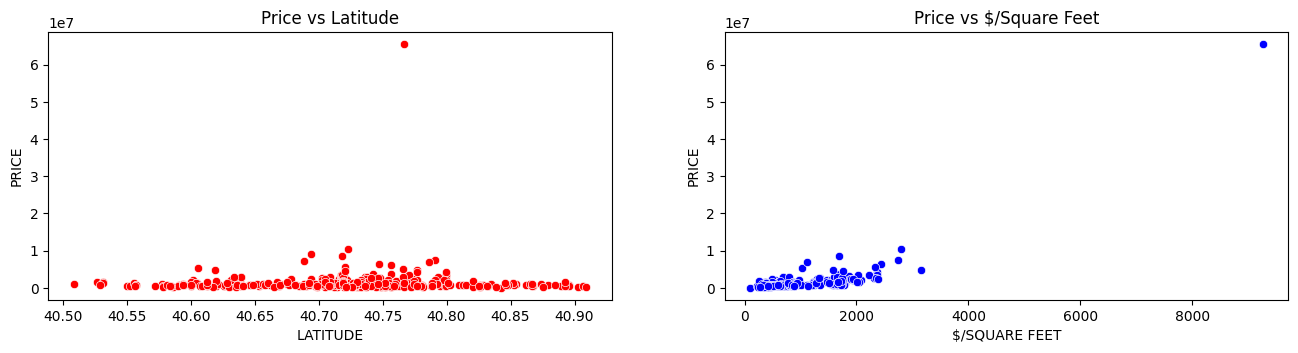

In [71]:
fig = plt.figure(figsize=(16,16))
fig.add_subplot(4,2,1)
plt.title("Price vs Latitude")
sns.scatterplot(x = df2['LATITUDE'], y = df2['PRICE'] ,color='red')
fig.add_subplot(4,2,2)
plt.title("Price vs $/Square Feet")
sns.scatterplot(x = df2['$/SQUARE FEET'], y = df2['PRICE'],color='blue')

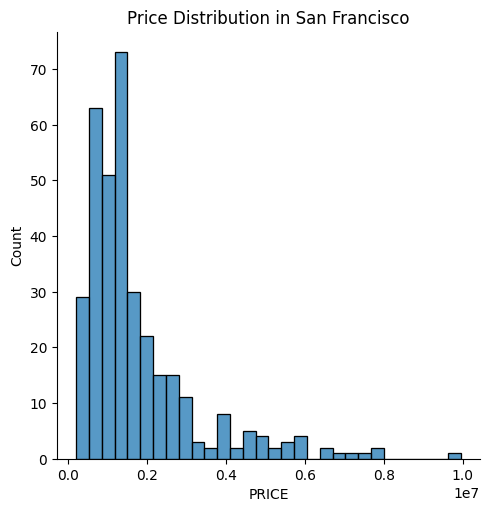

In [72]:
#distribution of features
#price
sns.displot(df1['PRICE'])
plt.title("Price Distribution in San Francisco")
plt.show()

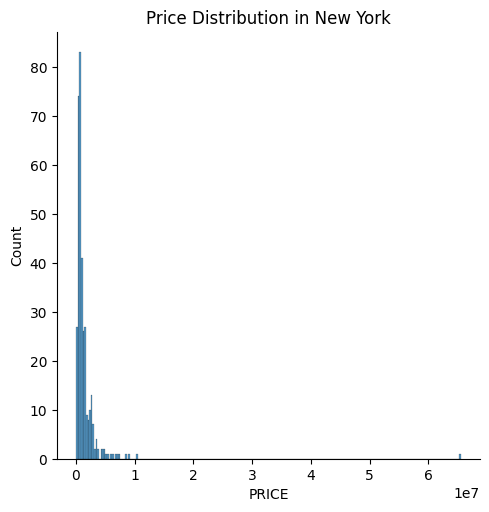

In [73]:
sns.displot(df2['PRICE'])
plt.title("Price Distribution in New York")
plt.show()

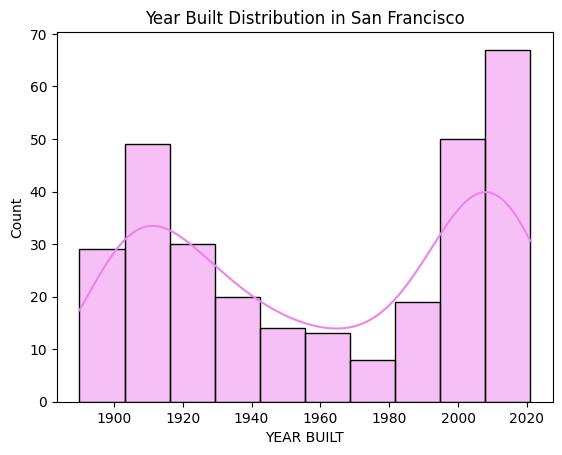

In [74]:
sns.histplot(df1["YEAR BUILT"], kde=True, color="violet")
plt.title("Year Built Distribution in San Francisco")
plt.show()

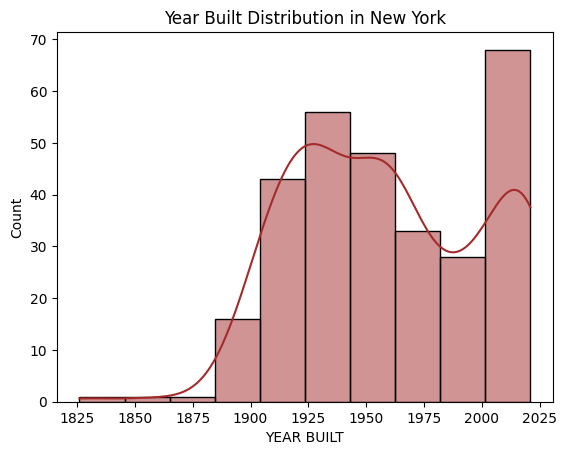

In [75]:
sns.histplot(df2["YEAR BUILT"], kde=True, color="brown")
plt.title("Year Built Distribution in New York")
plt.show()

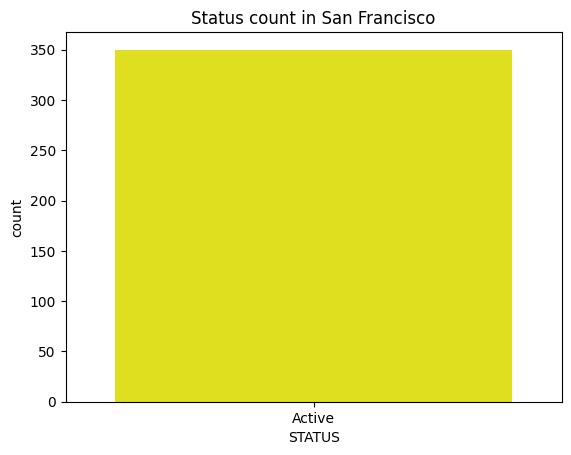

In [76]:
#interested
sns.countplot(x ='STATUS', data = df1, color = 'Yellow')
plt.title("Status count in San Francisco")
plt.show()

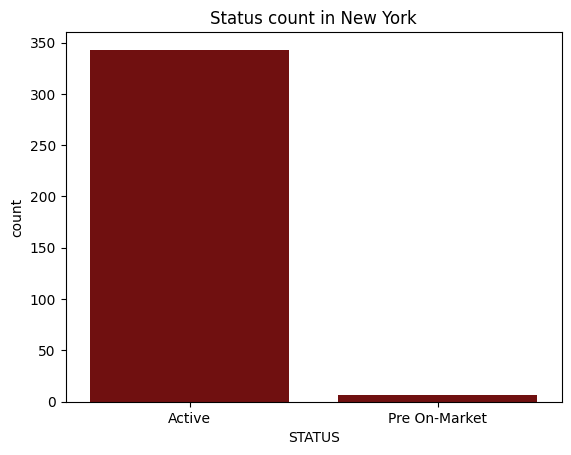

In [77]:
sns.countplot(x ='STATUS', data = df2 ,color = 'Maroon')
plt.title("Status count in New York")
plt.show()

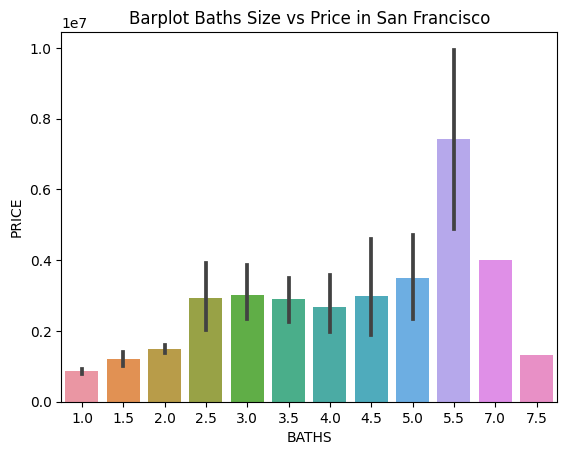

In [78]:
#relationship between features
sns.barplot(x=df1['BATHS'] , y = df1['PRICE'])
plt.title("Barplot Baths Size vs Price in San Francisco")
plt.show()

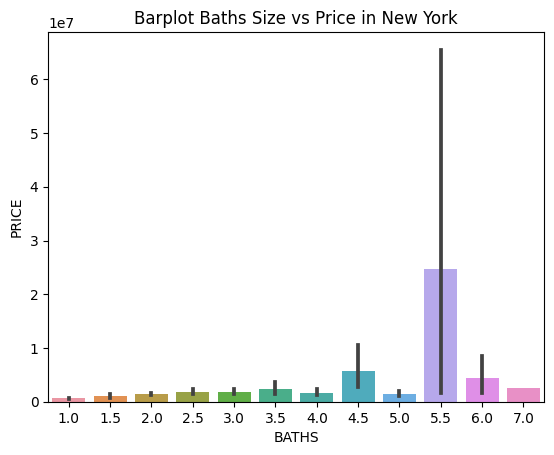

In [79]:
sns.barplot(x=df2['BATHS'] , y = df2['PRICE'])
plt.title("Barplot Baths Size vs Price in New York")
plt.show()

In [80]:
#Data preparation and Cleaning

In [81]:
#checking and handling missing values
nulldata1 = round(100 *(df1.isnull().sum())/ len(df1), 2)
nulldata2 = round(100 *(df2.isnull().sum())/ len(df2), 2)

In [82]:
print(nulldata1)
print(nulldata2) 

SALE TYPE                                                                                        0.00
SOLD DATE                                                                                      100.00
PROPERTY TYPE                                                                                    0.00
ADDRESS                                                                                          0.29
CITY                                                                                             0.00
STATE OR PROVINCE                                                                                0.00
ZIP OR POSTAL CODE                                                                               0.00
PRICE                                                                                            0.00
BEDS                                                                                             1.43
BATHS                                                                             

In [83]:
selected_cols1 = df1.columns[nulldata1 < 5]
selected_cols2 = df1.columns[nulldata2 < 5]

In [84]:
print(selected_cols1)
print(selected_cols2)

Index(['SALE TYPE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE',
       'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'LOCATION', 'DAYS ON MARKET',
       'STATUS',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')
Index(['SALE TYPE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE',
       'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION',
       'DAYS ON MARKET', 'STATUS',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')


In [85]:
df1 = df1[selected_cols1]
df2 = df2[selected_cols2]

In [86]:
# Data for sanfrancisco (df1)

df1['BEDS']=df1['BEDS'].fillna(df1['BEDS'].mean())

df1.drop(["INTERESTED"], axis=1, inplace=True)
df1.drop(["FAVORITE"], axis=1, inplace=True)
df1.drop(["STATE OR PROVINCE"], axis=1, inplace=True)
df1.drop(["URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)"], axis=1, inplace=True)
df1.drop(["SOURCE"], axis=1, inplace=True)
df1.drop(["MLS#"], axis=1, inplace=True)

df1.drop(["STATUS"], axis=1, inplace=True)
df1.drop(["ADDRESS"], axis=1, inplace=True)
df1.drop(["LOCATION"], axis=1, inplace=True)
df1.drop(["CITY"], axis=1, inplace=True)
df1.drop(["SALE TYPE"], axis=1, inplace=True)

df1.replace({"PROPERTY TYPE":{"Condo/Co-op":0, "Single Family Residential":1, "Multi-Family (2-4 Unit)":2, "Townhouse":3, "Vacant Land":4, "Multi-Family (5+ Unit)":5, "Other":6}}, inplace=True)

In [87]:
# Data for New york

df2['BATHS']=df2['BATHS'].fillna(df2['BATHS'].mean())
df2['BEDS']=df2['BEDS'].fillna(df2['BEDS'].mean())

df2.drop(["INTERESTED"], axis=1, inplace=True)
df2.drop(["FAVORITE"], axis=1, inplace=True)
df2.drop(["STATE OR PROVINCE"], axis=1, inplace=True)
df2.drop(["URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)"], axis=1, inplace=True)
df2.drop(["SOURCE"], axis=1, inplace=True)
df2.drop(["MLS#"], axis=1, inplace=True)
df2.drop(["LOCATION"], axis=1, inplace=True)

df2.replace({"STATUS":{"Active":1, "Pre On-Market":0}}, inplace=True)
df2.replace({"PROPERTY TYPE":{"Condo/Co-op":0, "Single Family Residential":1, "Multi-Family (2-4 Unit)":2, "Townhouse":3, "Vacant Land":4, "Multi-Family (5+ Unit)":5}}, inplace=True)

In [88]:
print(df1.shape)
print(df2.shape)

(350, 7)
(350, 12)


In [89]:
final_df = pd.concat([df1, df2], axis = 0)

In [90]:
final_df.shape

(700, 12)

In [91]:
final_df

,PROPERTY TYPE,ZIP OR POSTAL CODE,PRICE,BEDS,DAYS ON MARKET,LATITUDE,LONGITUDE,SALE TYPE,ADDRESS,CITY,BATHS,STATUS
0,0,94102,620000,1.0,1,37.781117,-122.421331,NaN,NaN,NaN,NaN,NaN
1,1,94110,1488888,4.0,38,37.737661,-122.424317,NaN,NaN,NaN,NaN,NaN
2,0,94109,998000,1.0,55,37.785102,-122.420584,NaN,NaN,NaN,NaN,NaN
3,0,94115,1995000,4.0,56,37.787874,-122.438460,NaN,NaN,NaN,NaN,NaN
4,0,94105,7900000,3.0,58,37.786375,-122.391993,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
345,0,10280,550000,1.0,2,40.708883,-74.016766,MLS Listing,280 Rector Pl Unit 6D,New York,1.0,1.0
346,0,11201,1335000,2.0,2,40.692591,-73.984937,MLS Listing,365 Bridge St Unit 2N,Brooklyn,2.0,1.0
347,0,11103,425000,1.0,2,40.758569,-73.914302,MLS Listing,44-02 Newtown Rd Unit 4S,Queens,1.0,1.0
348,0,10280,599000,1.0,2,40.708133,-74.017798,MLS Listing,21 S End Ave #435,New York,1.0,1.0


In [92]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [93]:
final_df

,PROPERTY TYPE,ZIP OR POSTAL CODE,PRICE,BEDS,DAYS ON MARKET,LATITUDE,LONGITUDE,SALE TYPE,ADDRESS,CITY,BATHS,STATUS
0,0,94102,620000,1.0,1,37.781117,-122.421331,NaN,NaN,NaN,NaN,NaN
1,1,94110,1488888,4.0,38,37.737661,-122.424317,NaN,NaN,NaN,NaN,NaN
2,0,94109,998000,1.0,55,37.785102,-122.420584,NaN,NaN,NaN,NaN,NaN
3,0,94115,1995000,4.0,56,37.787874,-122.438460,NaN,NaN,NaN,NaN,NaN
4,0,94105,7900000,3.0,58,37.786375,-122.391993,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
345,0,10280,550000,1.0,2,40.708883,-74.016766,MLS Listing,280 Rector Pl Unit 6D,New York,1.0,1.0
346,0,11201,1335000,2.0,2,40.692591,-73.984937,MLS Listing,365 Bridge St Unit 2N,Brooklyn,2.0,1.0
347,0,11103,425000,1.0,2,40.758569,-73.914302,MLS Listing,44-02 Newtown Rd Unit 4S,Queens,1.0,1.0
348,0,10280,599000,1.0,2,40.708133,-74.017798,MLS Listing,21 S End Ave #435,New York,1.0,1.0


In [94]:
final_df.drop(["CITY"], axis = 1, inplace = True)

In [95]:
final_df.drop(["SALE TYPE"], axis = 1, inplace = True)

In [96]:
final_df

,PROPERTY TYPE,ZIP OR POSTAL CODE,PRICE,BEDS,DAYS ON MARKET,LATITUDE,LONGITUDE,ADDRESS,BATHS,STATUS
0,0,94102,620000,1.0,1,37.781117,-122.421331,NaN,NaN,NaN
1,1,94110,1488888,4.0,38,37.737661,-122.424317,NaN,NaN,NaN
2,0,94109,998000,1.0,55,37.785102,-122.420584,NaN,NaN,NaN
3,0,94115,1995000,4.0,56,37.787874,-122.438460,NaN,NaN,NaN
4,0,94105,7900000,3.0,58,37.786375,-122.391993,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
345,0,10280,550000,1.0,2,40.708883,-74.016766,280 Rector Pl Unit 6D,1.0,1.0
346,0,11201,1335000,2.0,2,40.692591,-73.984937,365 Bridge St Unit 2N,2.0,1.0
347,0,11103,425000,1.0,2,40.758569,-73.914302,44-02 Newtown Rd Unit 4S,1.0,1.0
348,0,10280,599000,1.0,2,40.708133,-74.017798,21 S End Ave #435,1.0,1.0


In [97]:
final_df.drop(["ADDRESS"], axis = 1, inplace = True)

In [98]:
final_df

,PROPERTY TYPE,ZIP OR POSTAL CODE,PRICE,BEDS,DAYS ON MARKET,LATITUDE,LONGITUDE,BATHS,STATUS
0,0,94102,620000,1.0,1,37.781117,-122.421331,NaN,NaN
1,1,94110,1488888,4.0,38,37.737661,-122.424317,NaN,NaN
2,0,94109,998000,1.0,55,37.785102,-122.420584,NaN,NaN
3,0,94115,1995000,4.0,56,37.787874,-122.438460,NaN,NaN
4,0,94105,7900000,3.0,58,37.786375,-122.391993,NaN,NaN
...,...,...,...,...,...,...,...,...,...
345,0,10280,550000,1.0,2,40.708883,-74.016766,1.0,1.0
346,0,11201,1335000,2.0,2,40.692591,-73.984937,2.0,1.0
347,0,11103,425000,1.0,2,40.758569,-73.914302,1.0,1.0
348,0,10280,599000,1.0,2,40.708133,-74.017798,1.0,1.0


In [99]:
final_df["BATHS"] = final_df["BATHS"].fillna(final_df["BATHS"].mean())

In [100]:
final_df

,PROPERTY TYPE,ZIP OR POSTAL CODE,PRICE,BEDS,DAYS ON MARKET,LATITUDE,LONGITUDE,BATHS,STATUS
0,0,94102,620000,1.0,1,37.781117,-122.421331,1.929825,NaN
1,1,94110,1488888,4.0,38,37.737661,-122.424317,1.929825,NaN
2,0,94109,998000,1.0,55,37.785102,-122.420584,1.929825,NaN
3,0,94115,1995000,4.0,56,37.787874,-122.438460,1.929825,NaN
4,0,94105,7900000,3.0,58,37.786375,-122.391993,1.929825,NaN
...,...,...,...,...,...,...,...,...,...
345,0,10280,550000,1.0,2,40.708883,-74.016766,1.000000,1.0
346,0,11201,1335000,2.0,2,40.692591,-73.984937,2.000000,1.0
347,0,11103,425000,1.0,2,40.758569,-73.914302,1.000000,1.0
348,0,10280,599000,1.0,2,40.708133,-74.017798,1.000000,1.0


In [101]:
final_df["STATUS"] = final_df["STATUS"].fillna(final_df["STATUS"].mode()[0])

In [102]:
final_df

,PROPERTY TYPE,ZIP OR POSTAL CODE,PRICE,BEDS,DAYS ON MARKET,LATITUDE,LONGITUDE,BATHS,STATUS
0,0,94102,620000,1.0,1,37.781117,-122.421331,1.929825,1.0
1,1,94110,1488888,4.0,38,37.737661,-122.424317,1.929825,1.0
2,0,94109,998000,1.0,55,37.785102,-122.420584,1.929825,1.0
3,0,94115,1995000,4.0,56,37.787874,-122.438460,1.929825,1.0
4,0,94105,7900000,3.0,58,37.786375,-122.391993,1.929825,1.0
...,...,...,...,...,...,...,...,...,...
345,0,10280,550000,1.0,2,40.708883,-74.016766,1.000000,1.0
346,0,11201,1335000,2.0,2,40.692591,-73.984937,2.000000,1.0
347,0,11103,425000,1.0,2,40.758569,-73.914302,1.000000,1.0
348,0,10280,599000,1.0,2,40.708133,-74.017798,1.000000,1.0


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [104]:
X = final_df.drop(columns="PRICE", axis = 1)
y = final_df["PRICE"]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [106]:
import matplotlib.pyplot as plt

In [107]:
try:
    import xgboost
except notfound:
    print("pip install xgboost")

In [108]:
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [109]:
data_prediction = model.predict(X_test)

error_score = metrics.r2_score(y_test, data_prediction)
print("Root Squared Error is: ",error_score*100,"%")

Root Squared Error is:  35.860396599986224 %


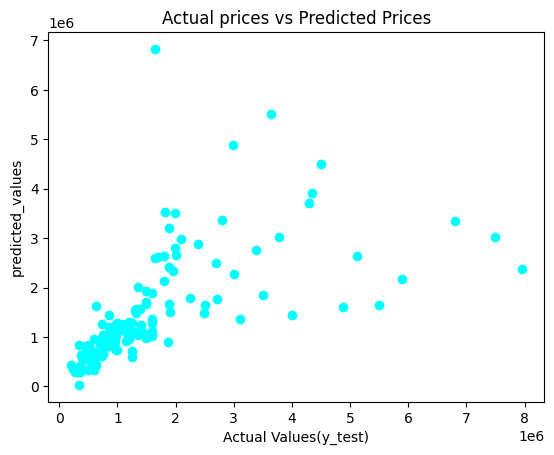

In [110]:
plt.scatter(y_test, data_prediction ,color = 'aqua')
plt.xlabel("Actual Values(y_test)")
plt.ylabel("predicted_values")
plt.title("Actual prices vs Predicted Prices")
plt.show()